In [1]:
import tensorflow as tf
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(1)
np.random.seed(1)

In [3]:
X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )
X.shape

(200, 2)

In [4]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [5]:
y = np.ones(len(X))
y.shape

(200,)

In [6]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
## XOR data

y[  X[:, 0] * X[:, 1] < 0   ] = 0
y.shape

(200,)

In [8]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

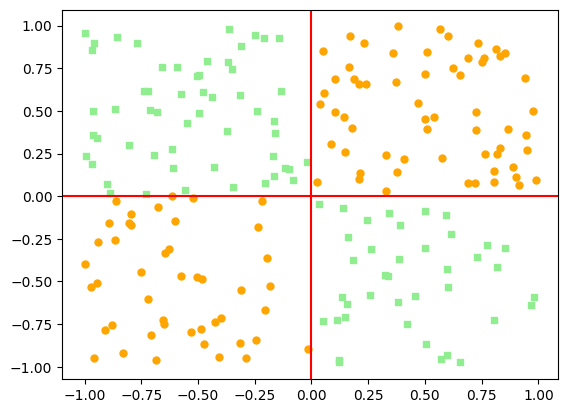

In [9]:
## plt.scatter(X[:, 0], X[:, 1] )


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=25,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=25,
            c='orange',
            marker='o',
            label='class1')
plt.axvline(x=0, c="red", label="x=0")
plt.axhline(y=0, c="red", label="y=0")
plt.show()

In [10]:
X_train = X[:100, :]
y_train = y[:100]
X_test  = X[100:,:]
y_test  = y[100:]

## Deep Neural Network
* with 3 hidden layers

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=80, activation='tanh'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=80, activation='tanh'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                120       
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (Dense)             (None, 80)                3280      
                                                                 
 dense_7 (Dense)             (None, 40)                3240      
                                                                 
 dense_8 (Dense)             (None, 80)                3280      
                                                                 
 dense_9 (Dense)             (None, 40)                3240      
                                                                 
 dense_10 (Dense)            (None, 1)                

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [22]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=8,
    verbose=1
)

Epoch 1/200
13/13 [==============================] - 1s 10ms/step - loss: 0.6877 - binary_accuracy: 0.5600 - val_loss: 0.6862 - val_binary_accuracy: 0.5900
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6821 - binary_accuracy: 0.7000 - val_loss: 0.6816 - val_binary_accuracy: 0.7100
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6773 - binary_accuracy: 0.7500 - val_loss: 0.6768 - val_binary_accuracy: 0.7300
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.7500 - val_loss: 0.6720 - val_binary_accuracy: 0.7200
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.7400 - val_loss: 0.6671 - val_binary_accuracy: 0.7200
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.7400 - val_loss: 0.6624 - val_binary_accuracy: 0.7200
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - lo

13/13 [==============================] - 0s 2ms/step - loss: 0.1042 - binary_accuracy: 0.9800 - val_loss: 0.1431 - val_binary_accuracy: 0.9600
Epoch 54/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0963 - binary_accuracy: 0.9800 - val_loss: 0.1420 - val_binary_accuracy: 0.9700
Epoch 55/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0953 - binary_accuracy: 0.9800 - val_loss: 0.1461 - val_binary_accuracy: 0.9600
Epoch 56/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0899 - binary_accuracy: 0.9800 - val_loss: 0.1355 - val_binary_accuracy: 0.9700
Epoch 57/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0846 - binary_accuracy: 0.9900 - val_loss: 0.1306 - val_binary_accuracy: 0.9700
Epoch 58/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0873 - binary_accuracy: 0.9800 - val_loss: 0.1290 - val_binary_accuracy: 0.9700
Epoch 59/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0

13/13 [==============================] - 0s 2ms/step - loss: 0.0365 - binary_accuracy: 0.9900 - val_loss: 0.0671 - val_binary_accuracy: 0.9800
Epoch 106/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0251 - binary_accuracy: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9700
Epoch 107/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0271 - binary_accuracy: 1.0000 - val_loss: 0.0916 - val_binary_accuracy: 0.9600
Epoch 108/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0236 - binary_accuracy: 1.0000 - val_loss: 0.0701 - val_binary_accuracy: 0.9700
Epoch 109/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0297 - binary_accuracy: 0.9900 - val_loss: 0.1252 - val_binary_accuracy: 0.9300
Epoch 110/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0370 - binary_accuracy: 0.9800 - val_loss: 0.1214 - val_binary_accuracy: 0.9400
Epoch 111/200
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.0171 - binary_accuracy: 0.9900 - val_loss: 0.1054 - val_binary_accuracy: 0.9400
Epoch 158/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0138 - binary_accuracy: 1.0000 - val_loss: 0.0652 - val_binary_accuracy: 0.9700
Epoch 159/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0115 - binary_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 1.0000
Epoch 160/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0114 - binary_accuracy: 1.0000 - val_loss: 0.1364 - val_binary_accuracy: 0.9300
Epoch 161/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0119 - binary_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9800
Epoch 162/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0175 - binary_accuracy: 0.9900 - val_loss: 0.0490 - val_binary_accuracy: 0.9800
Epoch 163/200
13/13 [==============================] - 0s 2ms/step - los

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

4/4 [==============================] - 0s 706us/step


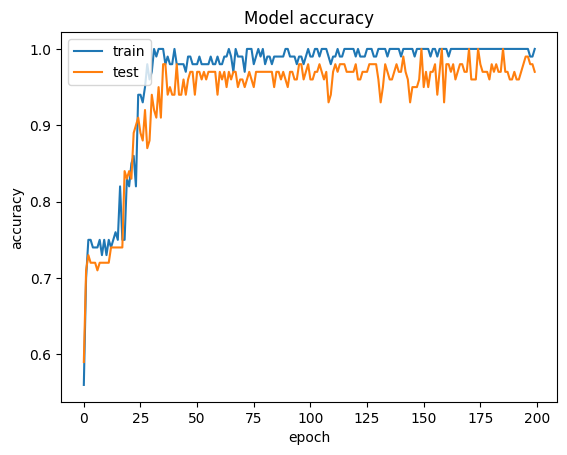

In [24]:
## train
plt.plot(history.history['binary_accuracy'])
## test
plt.plot(history.history['val_binary_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

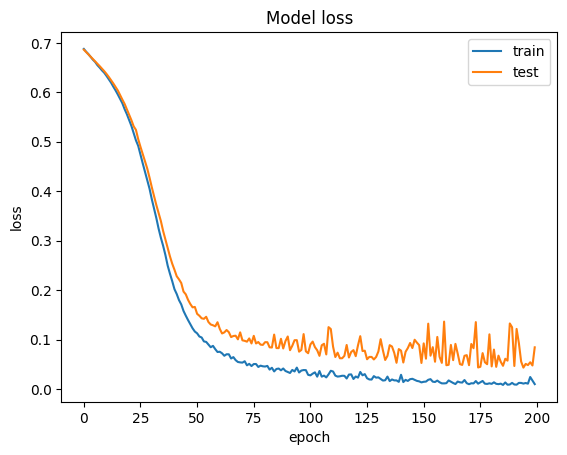

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

# Result

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Train_Accuracy: ', np.max(history.history['binary_accuracy']))
print('Test_Accuracy: ', np.max(history.history['val_binary_accuracy']))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Train_Accuracy:  1.0
Test_Accuracy:  1.0
Precision: 0.9464285714285714
Recall: 1.0
F1 Score: 0.9724770642201834


In [27]:
model.save('modelGHP.h5')